# Import Necessary Libraries

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Loading

In [184]:
data = pd.read_csv("C:/Users/SRA/Desktop/backup/C/MLgrit/time_series_project/data/2022.csv")
data.head()

,tpep_pickup_datetime,passenger_demand,taxi_demand
0,2022-03-31 15:00:00,4,4
1,2022-03-31 16:00:00,3,3
2,2022-03-31 17:00:00,0,0
3,2022-03-31 18:00:00,0,0
4,2022-03-31 19:00:00,0,0


In [185]:
data.tail()

,tpep_pickup_datetime,passenger_demand,taxi_demand
21619,2022-09-30 19:00:00,12107,8576
21620,2022-09-30 20:00:00,9959,6905
21621,2022-09-30 21:00:00,10046,6894
21622,2022-09-30 22:00:00,10244,6999
21623,2022-09-30 23:00:00,9633,6547


In [186]:
data.shape

(21624, 3)

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21624 entries, 0 to 21623
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tpep_pickup_datetime  21624 non-null  object
 1   passenger_demand      21624 non-null  int64 
 2   taxi_demand           21624 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 506.9+ KB


In [188]:
df = data.copy()

In [189]:
###
df['timestamp'] = pd.to_datetime(df.tpep_pickup_datetime)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21624 entries, 0 to 21623
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tpep_pickup_datetime  21624 non-null  object        
 1   passenger_demand      21624 non-null  int64         
 2   taxi_demand           21624 non-null  int64         
 3   timestamp             21624 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 675.9+ KB


In [191]:
###
df.drop(columns=['tpep_pickup_datetime'], inplace= True)

In [192]:
df

,passenger_demand,taxi_demand,timestamp
0,4,4,2022-03-31 15:00:00
1,3,3,2022-03-31 16:00:00
2,0,0,2022-03-31 17:00:00
3,0,0,2022-03-31 18:00:00
4,0,0,2022-03-31 19:00:00
...,...,...,...
21619,12107,8576,2022-09-30 19:00:00
21620,9959,6905,2022-09-30 20:00:00
21621,10046,6894,2022-09-30 21:00:00
21622,10244,6999,2022-09-30 22:00:00


# Checking Duplicates

In [193]:
# Check for duplicate values
value_counts  = df.duplicated(subset='timestamp').value_counts()
print(value_counts )

False    11343
True     10281
Name: count, dtype: int64


### As we can see there is 10281 duplicates values we have to remove it

# Dropping Duplicates

In [194]:
###
df.drop_duplicates(subset= ['timestamp'], inplace=True)

In [195]:
df.duplicated().sum()

0

In [196]:
df.shape

(11343, 3)

In [197]:
###
df = df[~(df.timestamp > pd.Timestamp('2022-12-31 00:00:00'))]
df

,passenger_demand,taxi_demand,timestamp
0,4,4,2022-03-31 15:00:00
1,3,3,2022-03-31 16:00:00
2,0,0,2022-03-31 17:00:00
3,0,0,2022-03-31 18:00:00
4,0,0,2022-03-31 19:00:00
...,...,...,...
19363,8489,6242,2022-05-31 11:00:00
19364,8714,6444,2022-05-31 12:00:00
19365,9389,6915,2022-05-31 13:00:00
19366,9997,7296,2022-05-31 14:00:00


# Handling Missing Values
- Detect
- Remove or Drop
- Filtering
- if the data is categorical then we have to use "Mode"
- if data is numerical, we have to use "mean", and "median".

# Detect Missing values

In [198]:
df.isnull()

,passenger_demand,taxi_demand,timestamp
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
19363,False,False,False
19364,False,False,False
19365,False,False,False
19366,False,False,False


In [199]:
df.isnull().sum()

passenger_demand    0
taxi_demand         0
timestamp           0
dtype: int64

In [200]:
df.isnull().sum().value_counts()

0    3
Name: count, dtype: int64

In [201]:
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
19363    0
19364    0
19365    0
19366    0
19367    0
Length: 8737, dtype: int64

In [202]:
df.isnull().sum(axis=1).value_counts()

0    8737
Name: count, dtype: int64

### There is no Missing Value

# Detect Outliers

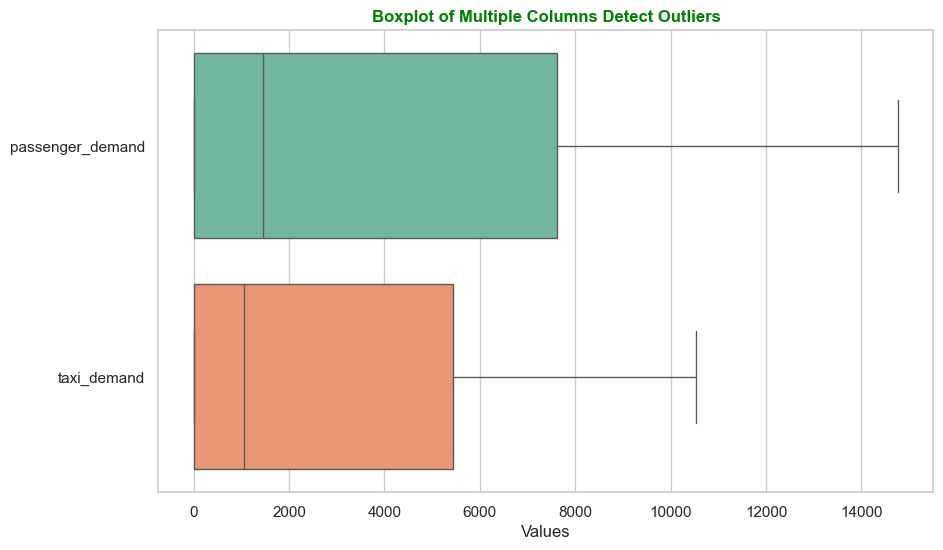

In [203]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient="h", palette="Set2")  # orient="h" for horizontal boxplots
plt.title('Boxplot of Multiple Columns Detect Outliers', color='green', weight= 'bold')
plt.xlabel('Values')
plt.show()

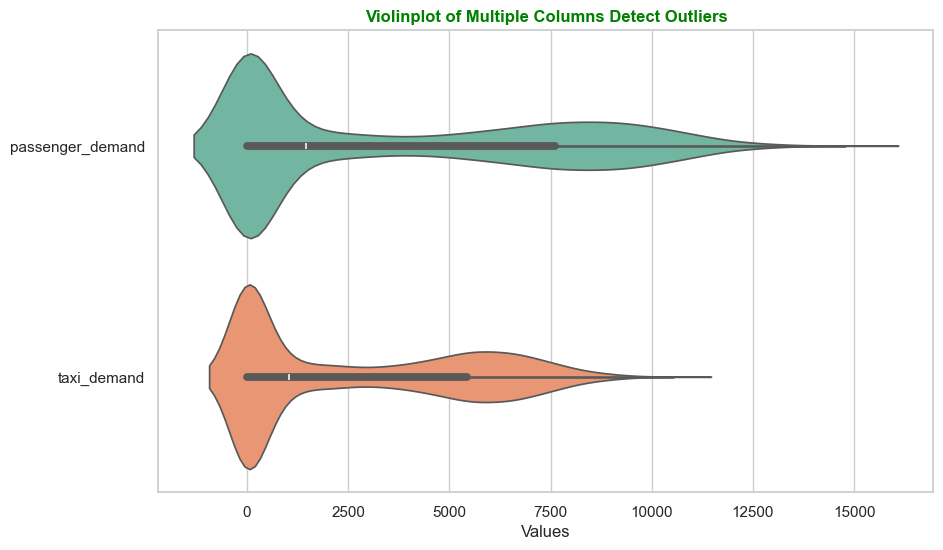

In [204]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, orient="h", palette="Set2")  # orient="h" for horizontal boxplots
plt.title('Violinplot of Multiple Columns Detect Outliers', color="green", weight= 'bold')
plt.xlabel('Values')
plt.show()

In [205]:
# sns.boxplot(data = data, x = "passenger_demand")

In [206]:
# sns.violinplot(data = data, x = "passenger_demand")

In [207]:
# sns.boxplot(data = data, x = "taxi_demand")

In [208]:
# sns.violinplot(data = data, x = "taxi_demand")

### There is no outliers in "VendorID" and "passenger_count"

# Save Clean Data

In [215]:
df.to_parquet(r"C:/Users/SRA/Desktop/backup/C/MLgrit/time_series_project/data/2022/V2_Clean_Data.parquet", index=False)

# Fixing Syntax Error